# Pyber Ride Sharing Data

There is a correlation between the total number of rides, total number of drivers, and the average fare of a ride. 

Trend 1: As is the case for urban cities, the lower the fare, the higher the volume of rides (demand) and drivers (supply). 

Trend 2: When compared to urban and suburban areas, rural cities have the highest fares, resulting in the lowest demand and supply of rides and drivers.

Trend 3: The majority of drivers (80.9%) are concentrated in urban cities where there is the most demand for Pyber's ride sharing services. 

In [83]:
# Displays figures in line
%matplotlib inline

# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# CSV files to load
city_data_to_load = "../Pyber/data/city_data.csv"
ride_data_to_load = "../Pyber/data/ride_data.csv"

# Read the City and Ride Data
cityDataDF = pd.read_csv(city_data_to_load)
rideDataDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyberDataDF = pd.merge(cityDataDF, rideDataDF, on="city", how="outer")

# Display the data table for preview
pyberDataDF.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [84]:
# Create separate data frames based on city types: Urban, Suburban, Rural
urbanDF = pyberDataDF.loc[pyberDataDF["type"]== "Urban"]
suburbanDF = pyberDataDF.loc[(pyberDataDF["type"]== "Suburban")]
ruralDF = pyberDataDF.loc[pyberDataDF["type"]== "Rural"]

# Urban: Calculate Average fare($), Total Rides, Total Drivers
avgUrbanFare = urbanDF.groupby("city")["fare"].mean()
tUrbanRides = urbanDF.groupby("city")["ride_id"].count()
tUrbanDrivers = urbanDF.groupby("city")["driver_count"].mean() 

# Suburban: Calculate Average fare($), Total Rides, Total Drivers
avgSuburbanFare = suburbanDF.groupby("city")["fare"].mean()
tSuburbanRides = suburbanDF.groupby("city")["ride_id"].count()
tSuburbanDrivers = suburbanDF.groupby("city")["driver_count"].mean()

# Rural: Calculate Average fare($), Total Rides, Total Drivers
avgRuralFare = ruralDF.groupby("city")["fare"].mean()
tRuralRides = ruralDF.groupby("city")["ride_id"].count()
tRuralDrivers = ruralDF.groupby("city")["driver_count"].mean()


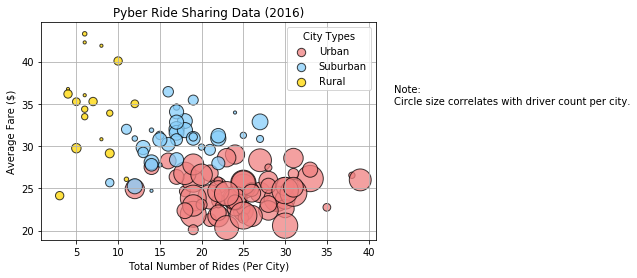

In [85]:
# Build scatter plots for each city type: Urban, Suburban, Rural

plt.scatter(tUrbanRides, avgUrbanFare, s=tUrbanDrivers*10, facecolors="lightcoral", 
            edgecolors="black", alpha=0.75, label="Urban")

plt.scatter(tSuburbanRides, avgSuburbanFare, s=tSuburbanDrivers*10, facecolors="lightskyblue", 
            edgecolors="black", alpha=0.75, label="Suburban")

plt.scatter(tRuralRides, avgRuralFare, s=tRuralDrivers*10, facecolors="gold", 
            edgecolors="black", alpha=0.75, label="Rural")

plt.show

# Create a legend, chart title, grid, and label axes
lgnd = plt.legend(title= "City Types", loc="upper right")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Incorporate a text label regarding circle size
plt.text(43, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Pyber/figures/scatter_plot_city_types.png")

# Show plot
plt.show()

## Total Fares by City Type

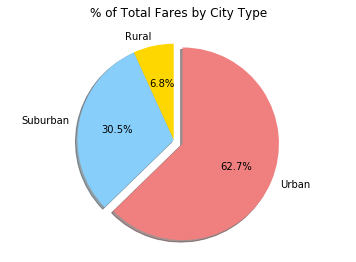

In [87]:
# Calculate fare total, fare total by city type, and percentage of fare total by city type
fareTotal = pyberDataDF["fare"].sum()
cTypeFareTotal = pyberDataDF.groupby("type")["fare"].sum()
cTypeFarePercent = (cTypeFareTotal / fareTotal)*100

# Set variables and build Pie Chart
fares = [fare for fare in cTypeFareTotal]
explode = [0, 0, 0.1]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Fares by City Type", y=1.05)
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/figures/total_fares_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

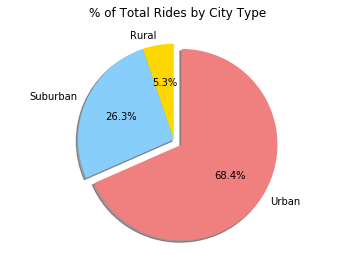

In [88]:
# Calculate Ride Percents
rideTotal = pyberDataDF["ride_id"].count()
cTypeRideTotal = pyberDataDF.groupby("type")["ride_id"].count()
cTypeRidePercent = (cTypeRideTotal / rideTotal)*100

# Set variables and build pie chart
rides = [ride for ride in cTypeRideTotal]
explode = [0, 0, 0.1]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Rides by City Type", y=1.05)
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/figures/total_rides_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

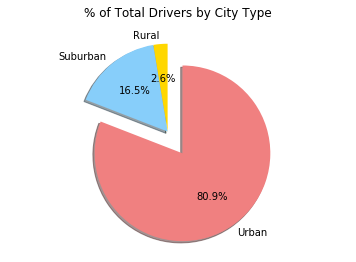

In [89]:
# Calculate Driver Percents
driverTotal = pyberDataDF.drop_duplicates("city")["driver_count"].sum()
cTypeDriverTotal = pyberDataDF.drop_duplicates("city").groupby("type")["driver_count"].sum()
cTypeDriverPercent = (cTypeDriverTotal / driverTotal)*100

# Set variables and build Pie Chart
drivers = [driver for driver in cTypeDriverTotal]
explode = [0, 0, 0.3]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Drivers by City Type",  y=1.05)
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/figures/total_drivers_city_type.png")

# Show Figure
plt.show()